## Setup

In [1]:
import torch
# import torchvision
# import torchvision.transforms as T
import matplotlib.pyplot as plt
from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt
from EIANN.network import build_EIANN_from_config

from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=1000)

epochs = 1
data_seed = 0
network_seed = 42

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## bpDale angle comparison

In [3]:
# Build network
config_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_bpDale_config_G_optimized.yaml"
saved_network_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps.pkl"

# config_path = "../config/MNIST/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G2.yaml"
# saved_network_path = 'saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps2.pkl'

bpDale_network = build_EIANN_from_config(config_path, network_seed=42)

# data_generator.manual_seed(data_seed)
# bpDale_network.train(train_dataloader, 
#                     test_dataloader, 
#                     epochs=epochs,
#                     val_interval=(0,-1,100),
#                     samples_per_epoch=20000,
#                     store_history=True, 
#                     store_params=True,
#                     status_bar=True)
# bpDale_network.save(path=saved_network_path)

bpDale_network.load(saved_network_path)

Loading model data from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps.pkl'


In [4]:
# pt.plot_batch_accuracy(bpDale_network, test_dataloader)

In [5]:
# ut.rename_population(bpDale_network, 'I', 'SomaI')
# bpDale_network.save('saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps2.pkl')

In [6]:
# pt.plot_loss_landscape(test_dataloader, bpDale_network)

In [20]:
# bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bpDale_network)
# ut.rename_population(bpClone_network, 'I', 'SomaI')
# bpClone_network.save('saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps_bpClone.pkl')

config_path = "../config/MNIST/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G2.yaml"
bpClone_network = build_EIANN_from_config(config_path, network_seed=42)
bpClone_network.load('saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps_bpClone.pkl')



Loading model data from 'saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps_bpClone.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps_bpClone.pkl'


In [ ]:
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bpDale_network, bpDale_network

In [21]:
bpClone_network2 = ut.compute_alternate_dParam_history(train_dataloader, bpDale_network, batch_size=100)
ut.rename_population(bpClone_network2, 'I', 'SomaI')

  0%|          | 0/200 [00:00<?, ?it/s]

In [25]:
# bpClone_network.param_history_batchstep = bpClone_network2.param_history
# bpClone_network.predicted_dParam_history_batchstep = bpClone_network2.predicted_dParam_history

# bpClone_network.params_to_save.append('param_history_batchstep')
# bpClone_network.params_to_save.append('predicted_dParam_history_batchstep')
# bpClone_network.save('saved_networks/20230815_EIANN_1_hidden_mnist_bpDale_softplus_SGD_config_G_66049_257_20000_steps_bpClone.pkl')


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.set_title(param_name)


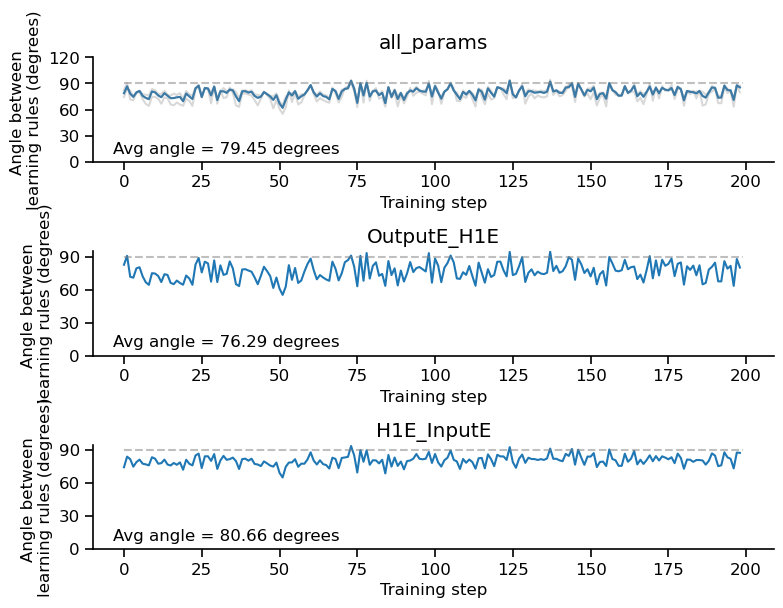

In [30]:
# Stepaveraged stochastic backprop vs small-batch backprop
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history_batchstep, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.set_title(param_name)


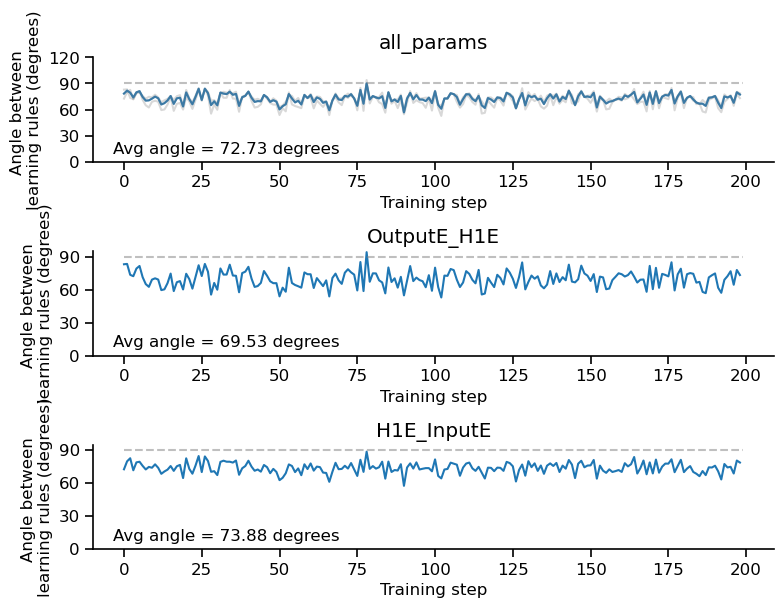

In [31]:
# Stepaveraged stochastic backprop vs fullbatch backprop
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)a

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.set_title(param_name)


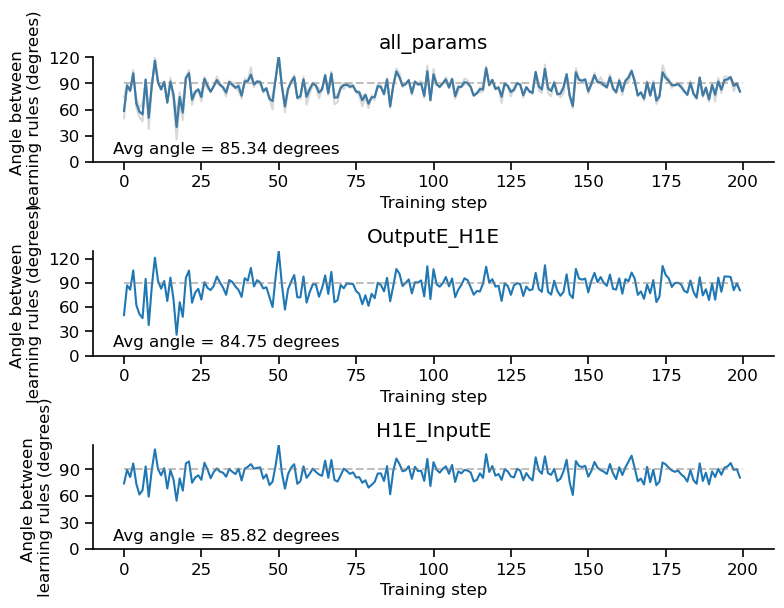

In [32]:
# Single-step stochastic backprop vs fullbatch backprop
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## BTSP angle comparison

In [27]:
# Build network
config_path = "../config/MNIST/20230822_EIANN_1_hidden_mnist_BTSP_config_G3.yaml"
btsp_network = build_EIANN_from_config(config_path, network_seed=42)

saved_network_path = "../optimize/data/mnist/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps.pkl"
btsp_network.load(saved_network_path)

Loading model data from '../optimize/data/mnist/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps.pkl'


In [28]:
# btsp_bpClone = ut.compute_alternate_dParam_history(train_dataloader, btsp_network, save_path='saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl')

config_path = "../config/MNIST/20230822_EIANN_1_hidden_mnist_BTSP_config_G3.yaml"
btsp_bpClone = build_EIANN_from_config(config_path, network_seed=42)
saved_network_path = 'saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl'
btsp_bpClone.load(saved_network_path)

Loading model data from 'saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl'


In [56]:
# btsp_bpClone2 = ut.compute_alternate_dParam_history(train_dataloader, btsp_network, batch_size=100)

# btsp_bpClone.param_history_batchstep = btsp_bpClone2.param_history
# btsp_bpClone.predicted_dParam_history_batchstep = btsp_bpClone2.predicted_dParam_history

# btsp_bpClone.params_to_save.append('param_history_batchstep')
# btsp_bpClone.params_to_save.append('predicted_dParam_history_batchstep')
# btsp_bpClone.save('saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl')


Model saved to saved_networks/20230822_EIANN_1_hidden_mnist_BTSP_config_G3_66049_257_20000_steps_bpClone.pkl


In [65]:
torch.all(btsp_bpClone2.predicted_dParam_history['module_dict.H1E_H1DendI.weight'][0]==0)

tensor(True)

In [61]:
btsp_bpClone2.actual_dParam_history['module_dict.H1E_H1DendI.weight']

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1297: RuntimeWarning: Mean of empty slice
  avg_angle = np.nanmean(angles[param_name])


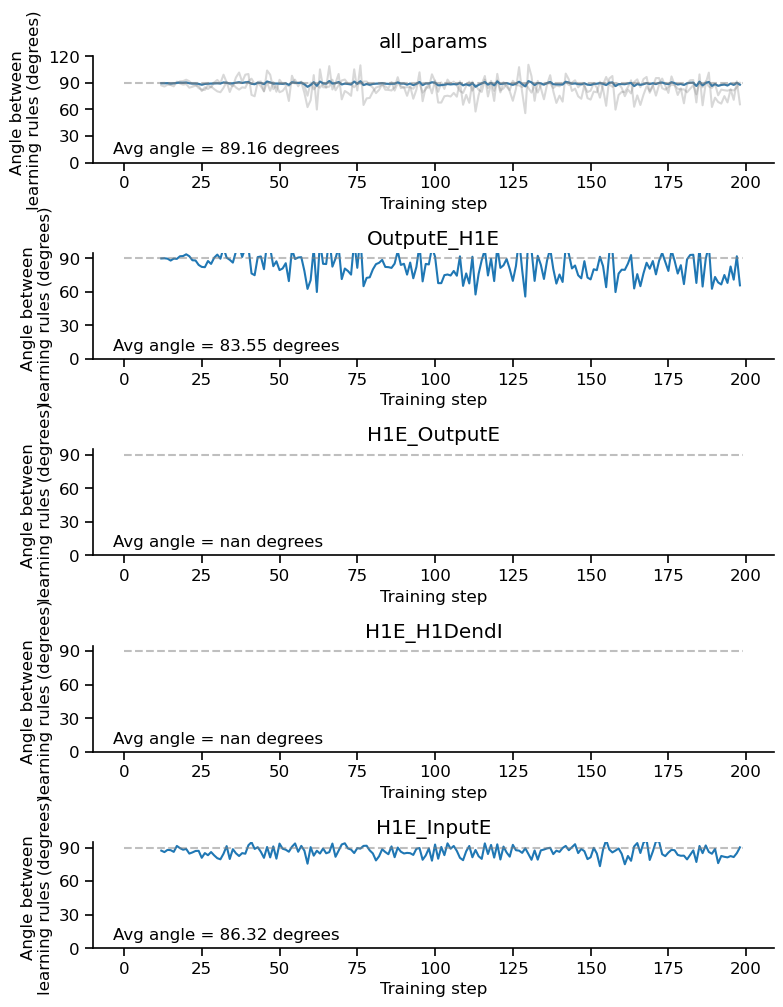

In [59]:
# Stepaveraged btsp vs small-batch backprop
angles = ut.compute_dW_angles(btsp_bpClone.predicted_dParam_history_batchstep, btsp_bpClone.actual_dParam_history_stepaveraged, plot=True)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1297: RuntimeWarning: Mean of empty slice
  avg_angle = np.nanmean(angles[param_name])


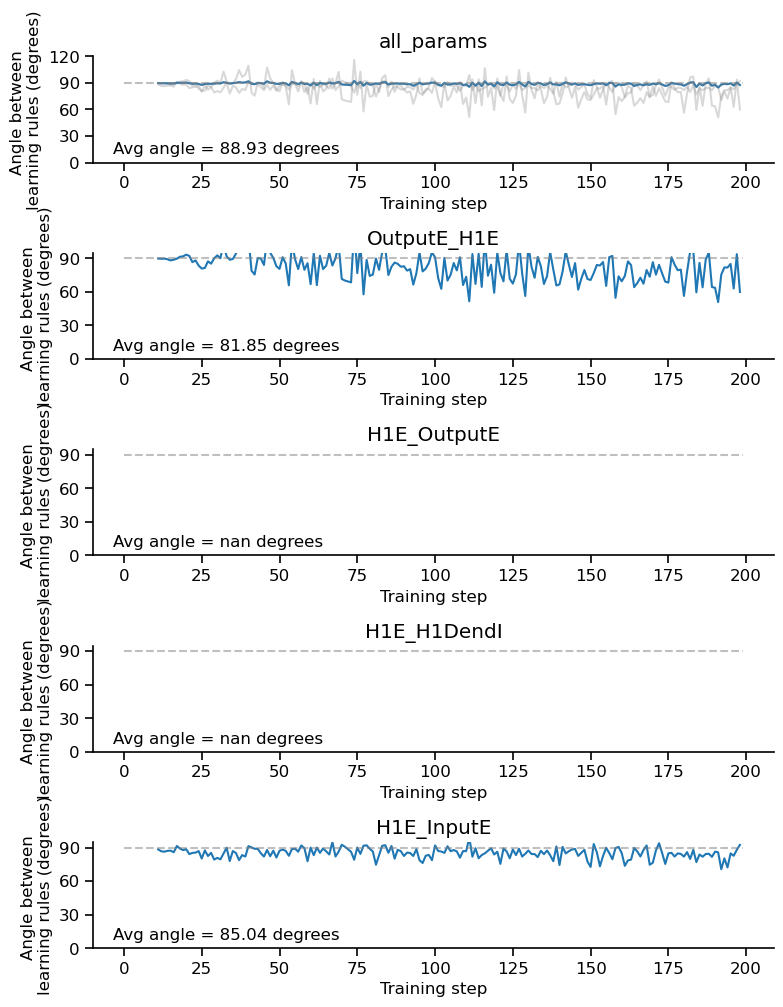

In [36]:
# Stepaveraged btsp vs fullbatch backprop
angles = ut.compute_dW_angles(btsp_bpClone.predicted_dParam_history, btsp_bpClone.actual_dParam_history_stepaveraged, plot=True)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1304: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1297: RuntimeWarning: Mean of empty slice
  avg_angle = np.nanmean(angles[param_name])


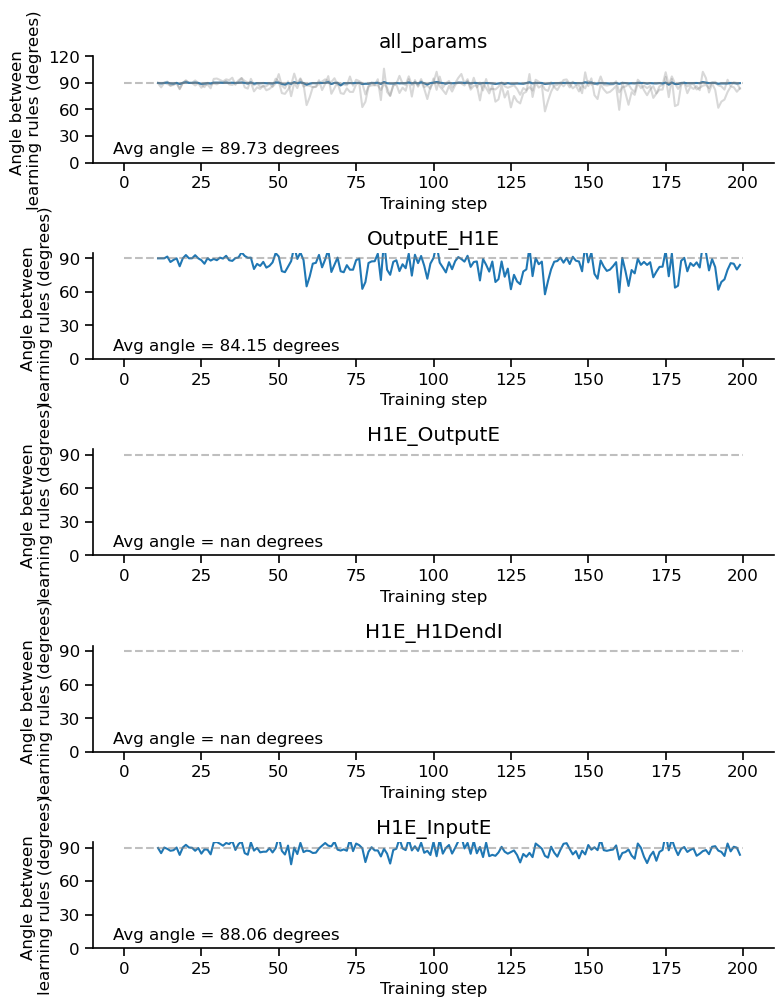

In [35]:
# Stochastic btsp vs fullbatch backprop
angles = ut.compute_dW_angles(btsp_bpClone.predicted_dParam_history, btsp_bpClone.actual_dParam_history, plot=True)

## Supervised Gj-Hebb

In [9]:
# Build network
config_path = "../config/MNIST/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F.yaml"
gj_network = build_EIANN_from_config(config_path, network_seed=42)
ut.rename_population(gj_network, 'I', 'SomaI')
saved_network_path = "../optimize/data/mnist/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257.pkl"
gj_network.load(saved_network_path)


Loading model data from '../optimize/data/mnist/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257.pkl'


In [11]:
# hebb_bpClone = ut.compute_alternate_dParam_history(train_dataloader,gj_network, save_path='saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl')

hebb_bpClone = build_EIANN_from_config(config_path, network_seed=42)
ut.rename_population(hebb_bpClone, 'I', 'SomaI')
saved_network_path = 'saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl'
hebb_bpClone.load(saved_network_path)

Loading model data from 'saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230505_EIANN_1_hidden_mnist_Supervised_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl'


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1307: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


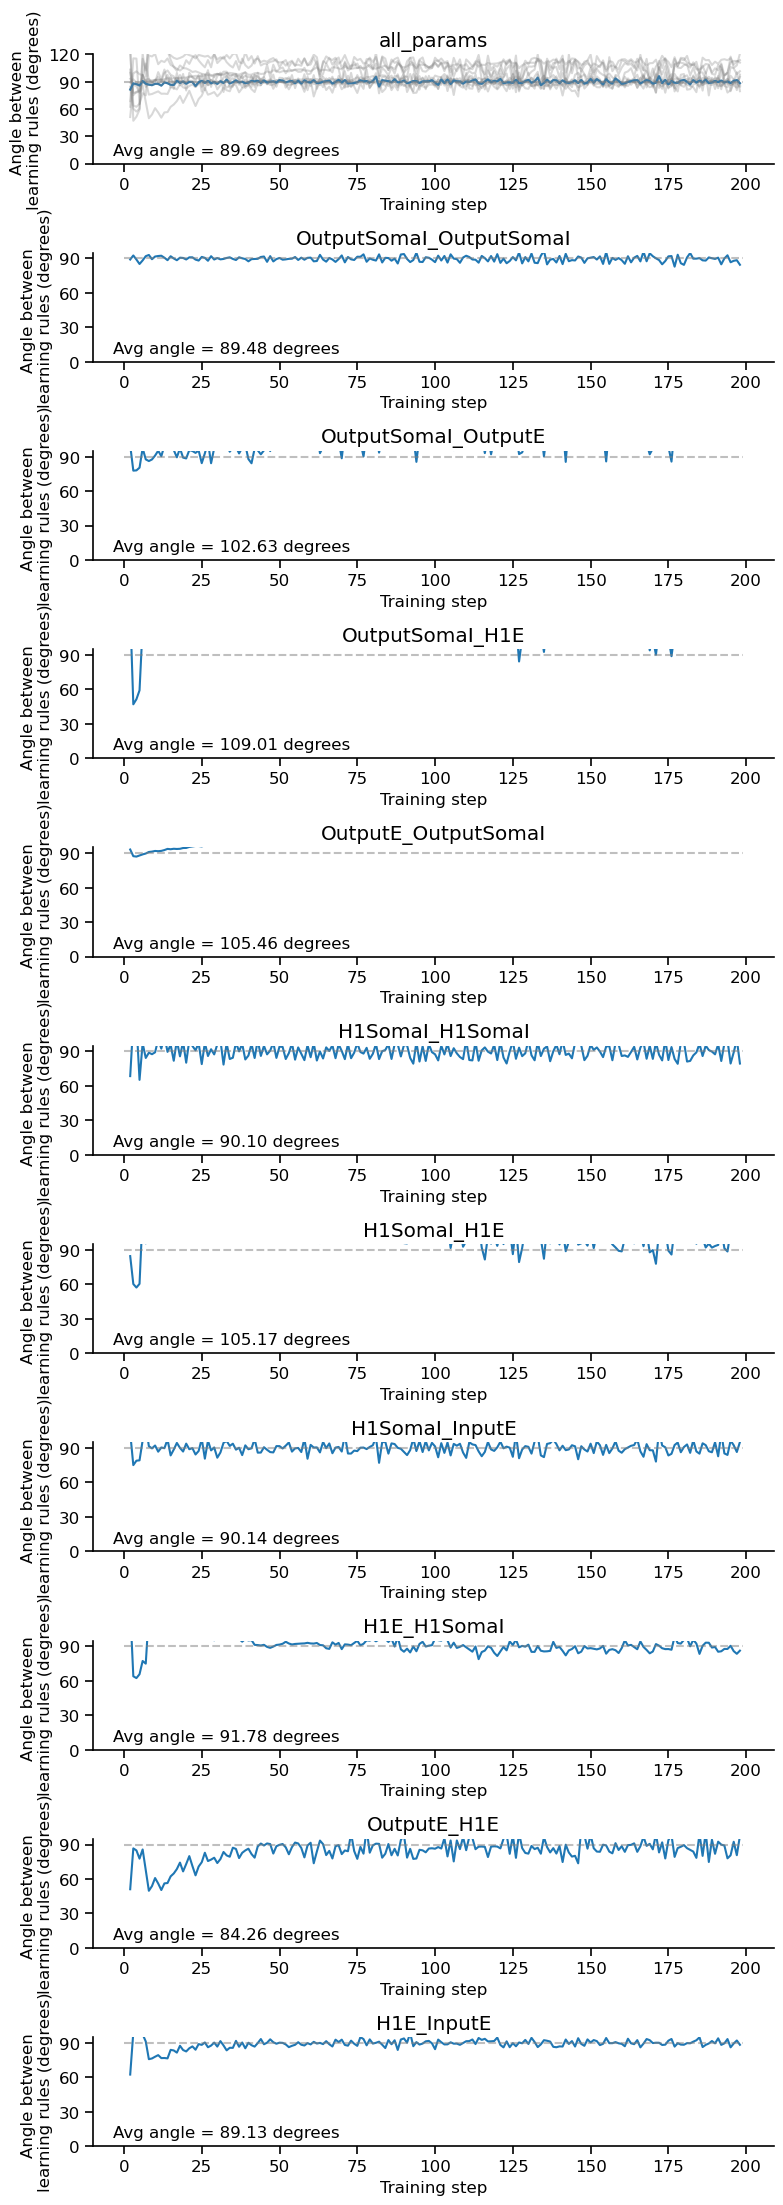

In [12]:
angles = ut.compute_dW_angles(hebb_bpClone, plot=True, step_averaged=True)

## Supervised BCM

In [6]:
# Build network
config_path = "../config/MNIST/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G.yaml"
bcm_network = build_EIANN_from_config(config_path, network_seed=42)

saved_network_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257.pkl"
bcm_network.load(saved_network_path)

Loading model data from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257.pkl'


In [7]:
# bcm_bpClone = ut.compute_alternate_dParam_history(train_dataloader,bcm_network, save_path='saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl')

bcm_bpClone = build_EIANN_from_config(config_path, network_seed=42)
saved_network_path = 'saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl'
bcm_bpClone.load(saved_network_path)

Loading model data from 'saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/20230815_EIANN_1_hidden_mnist_Supervised_BCM_config_G_66049_257_bpClone.pkl'


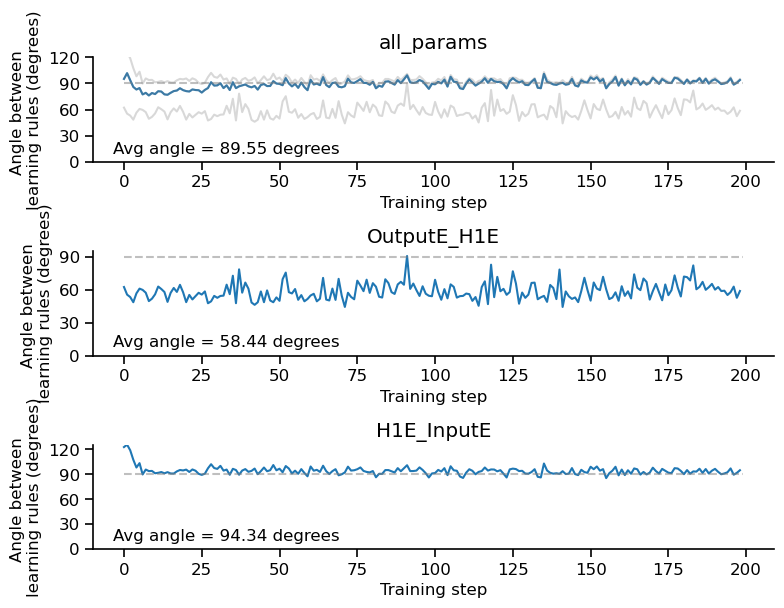

In [8]:
angles = ut.compute_dW_angles(bcm_bpClone, plot=True, step_averaged=True)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1323: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  idx, data, target = next(iter(dataloader))


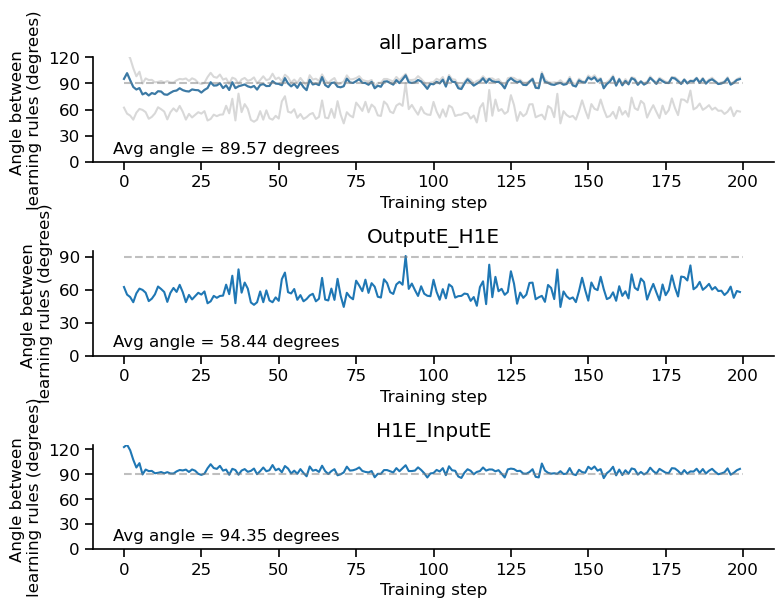

In [66]:
angles = ut.compute_dW_angles(bcm_bpClone.predicted_dParam_history, bcm_bpClone.actual_dParam_history, plot=True)

## Unsupervised Gj-Hebb

In [16]:
# Build network
config_path = "../config/MNIST/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F.yaml"
ugj_network = build_EIANN_from_config(config_path, network_seed=42)
ut.rename_population(ugj_network, 'I', 'SomaI')

saved_network_path = "../optimize/data/mnist/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257.pkl"
ugj_network.load(saved_network_path)

Loading model data from '../optimize/data/mnist/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257.pkl'


In [17]:
ugj_bpClone = ut.compute_alternate_dParam_history(train_dataloader, ugj_network, save_path='saved_networks/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl')

# ugj_bpClone = build_EIANN_from_config(config_path, network_seed=42)
# saved_network_path = 'saved_networks/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl'
# ugj_bpClone.load(saved_network_path)

  0%|          | 0/200 [00:00<?, ?it/s]

Model saved to saved_networks/20230712_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_F_66049_257_bpClone.pkl


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1309: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return angles


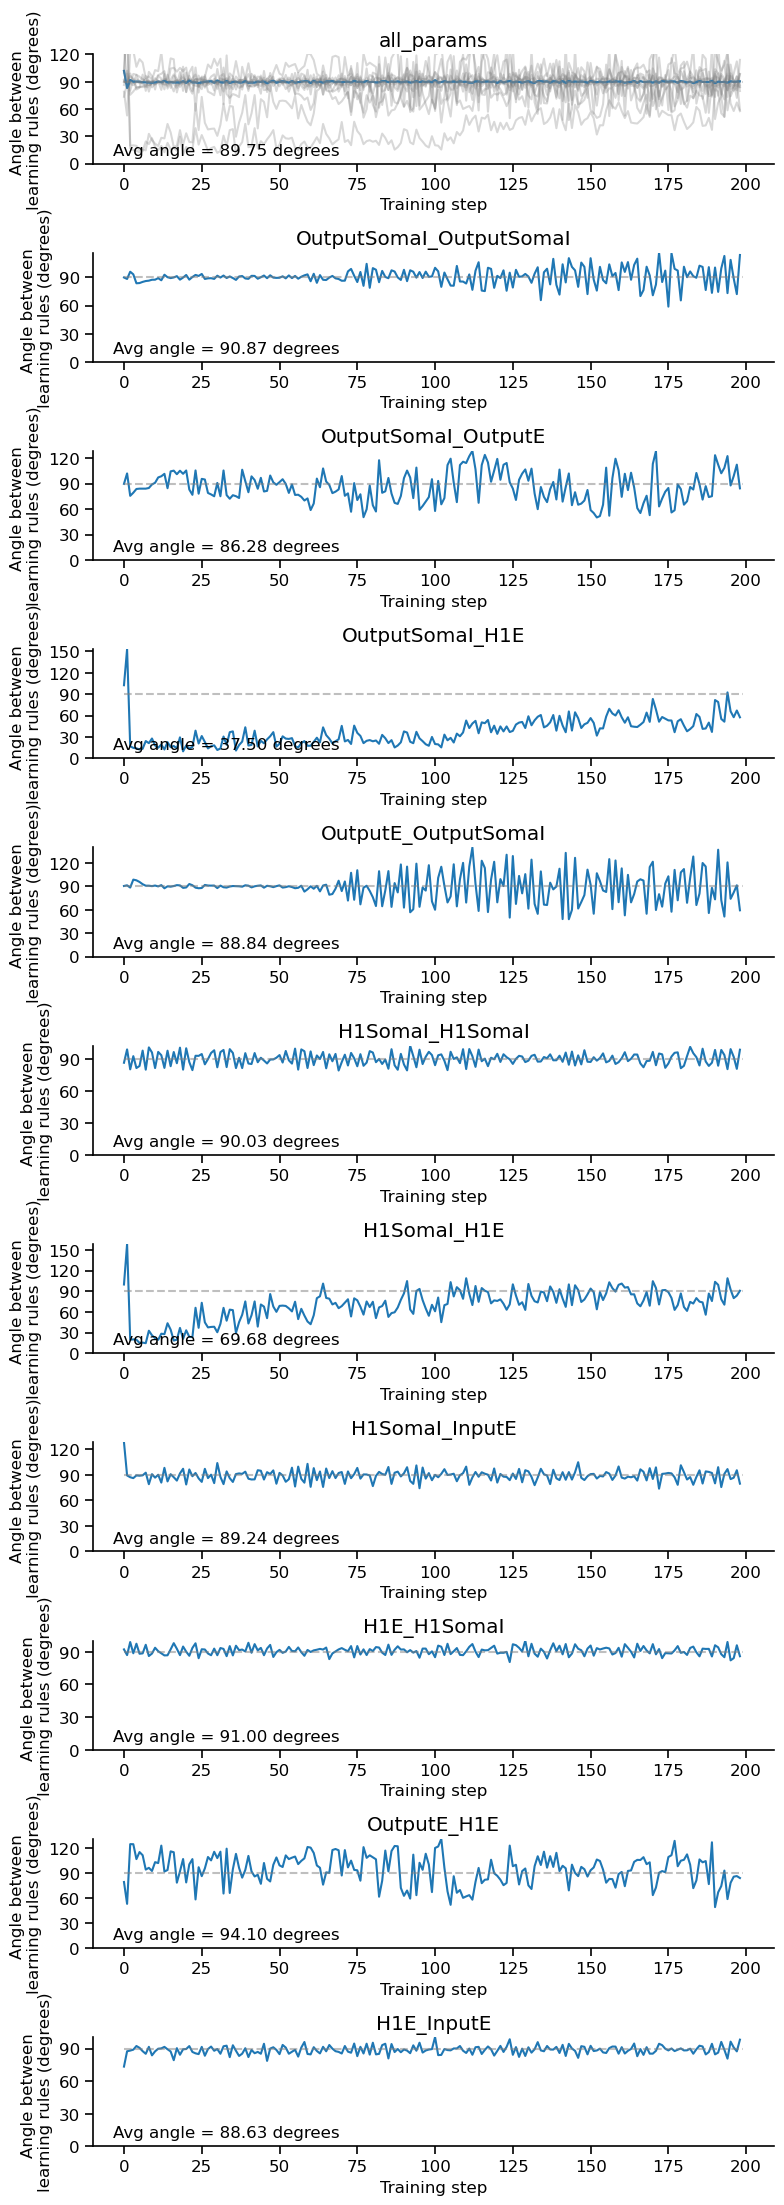

In [18]:
angles = ut.compute_dW_angles(ugj_bpClone, plot=True, step_averaged=True)

## Unsupervised BCM

In [2]:
# Build network
config_path = "../config/MNIST/20230815_EIANN_1_hidden_mnist_BCM_config_G.yaml"
ubcm_network = build_EIANN_from_config(config_path, network_seed=42)

saved_network_path = "../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257.pkl"
ubcm_network.load(saved_network_path)

Loading model data from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257.pkl'...
Loading parameters into the network...
Model successfully loaded from '../optimize/data/mnist/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257.pkl'


In [3]:
ubcm_bpClone = ut.compute_alternate_dParam_history(train_dataloader, ubcm_network, save_path='saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_bpClone.pkl')

# ubcm_bpClone = build_EIANN_from_config(config_path, network_seed=42)
# saved_network_path = 'saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_bpClone.pkl'
# ubcm_bpClone.load(saved_network_path)

  0%|          | 0/200 [00:00<?, ?it/s]

Model saved to saved_networks/20230815_EIANN_1_hidden_mnist_BCM_config_G_66049_257_bpClone.pkl


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1307: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


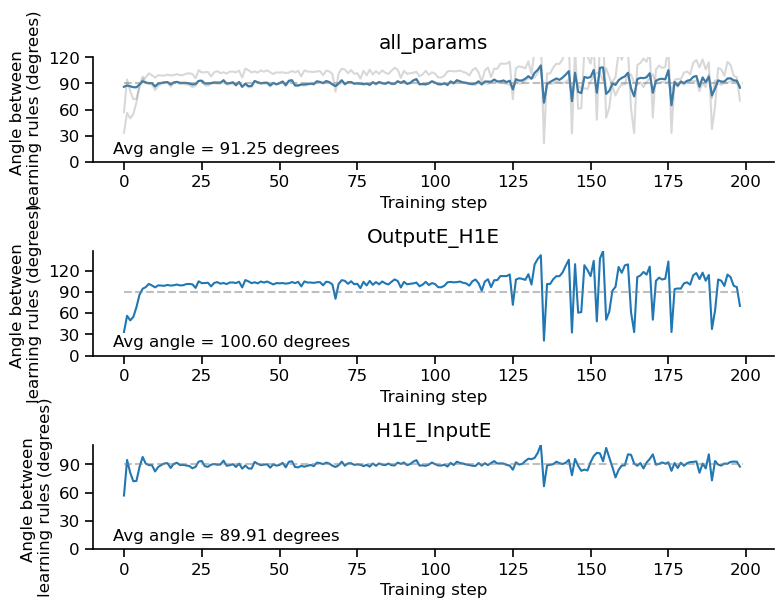

In [4]:
angles = ut.compute_dW_angles(ubcm_bpClone, plot=True, step_averaged=True)